<img src="slides/Slide1.jpeg">

* SVP prendre des voteurs à l'avant de la classe
* Accéder au Notebook d'aujourd'hui: https://mybinder.org/v2/gh/EveCharbie/Cours5/main?labpath=differentiation_numerique_etudiants.ipynb (ce lien aurait été dans le plan de cours)

<img src="slides/Slide2.jpeg">

<img src="slides/Slide3.jpeg">

<img src="slides/Slide4.jpeg">

<img src="slides/Slide5.jpeg">

<img src="slides/Slide6.jpeg">

<img src="slides/Slide7.jpeg">

<img src="slides/Slide8.jpeg">

<img src="slides/Slide9.jpeg">

<img src="slides/Slide10.jpeg">

<img src="slides/Slide11.jpeg">

<img src="slides/Slide12.jpeg">

<img src="slides/Slide13.jpeg">

<img src="slides/Slide14.jpeg">

<img src="slides/Slide15.jpeg">

<img src="slides/Slide16.jpeg">

<img src="slides/Slide17.jpeg">

<img src="slides/Slide18.jpeg">

<img src="slides/Slide19.jpeg">

<img src="slides/Slide20.jpeg">

<img src="slides/Slide21.jpeg">

In [2]:
def difference_finie_avant(x, t):
    """
    x: points de données
    t: temps auxquels ces données ont été mesurées
    """
    return

<img src="slides/Slide22.jpeg">

<img src="slides/Slide23.jpeg">

<img src="slides/Slide24.jpeg">

In [4]:
def difference_finie_arriere(x, t):
    """
    x: points de données
    t: temps auxquels ces données ont été mesurées
    """
    return

<img src="slides/Slide25.jpeg">

<img src="slides/Slide26.jpeg">

In [3]:
def difference_finie_centree(x, t):
    return

<img src="slides/Slide27.jpeg">

<img src="slides/Slide28.jpeg">

<img src="slides/Slide29.jpeg">

<img src="slides/Slide30.jpeg">

<img src="slides/Slide31.jpeg">

<img src="slides/Slide32.jpeg">

<img src="slides/Slide33.jpeg">

In [15]:
def difference_finie_seconde_centree(x, t):
    pente_avant =
    pente_arriere =
    return

<img src="slides/Slide34.jpeg">

<img src="slides/Slide35.jpeg">

<img src="slides/Slide36.jpeg">

<img src="slides/Slide37.jpeg">

## Import des librairies

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## Import des données de la montre durant un entraînement de course.

In [9]:
# Charger les données
dataset = pd.read_csv("interval_training_data.csv")
longitude = np.array(dataset["_lon"]) * 2*np.pi/360
latitude = np.array(dataset["_lat"]) * 2*np.pi/360
elevation_montre = np.array(dataset["ele"])
timestamps = np.array(dataset["time"])

# Convertir les timestamps en secondes
temps = np.array([datetime.strptime(time, '%Y-%m-%dT%H:%M:%SZ').timestamp() for time in timestamps])
temps = temps - temps[0]

# Convertir les coordonnées en mètres
R = 6367281 + np.mean(elevation_montre)  # Rayon de la Terre à Montréal en mètres

position_x = R * np.cos(latitude)
position_y = R * np.cos(longitude)
position_x = position_x - position_x[0]
position_y = position_y - position_y[0]
distance_parcourue = np.linalg.norm(np.array([position_x[1:] - position_x[:-1], position_y[1:] - position_y[:-1]]), axis=0)

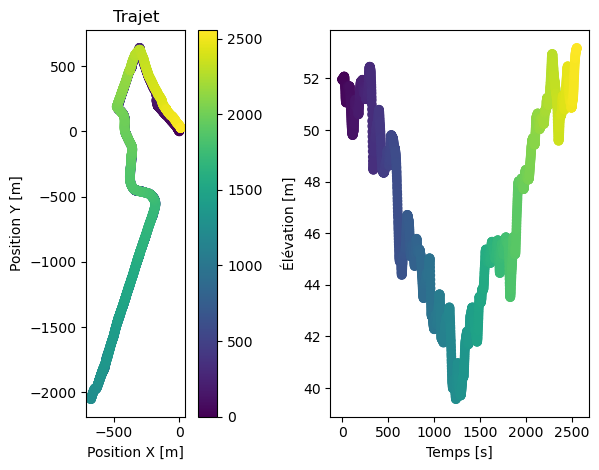

Distance totale: 7.3436373273124556 km


In [10]:
# Afficher les données pour vérifier que tout semble correct
fig, axs = plt.subplots(1, 2)
scat = axs[0].scatter(position_x, position_y, c=temps)
axs[0].set_xlabel("Position X [m]")
axs[0].set_ylabel("Position Y [m]")
axs[0].set_title("Trajet")
axs[1].scatter(temps, elevation_montre, c=temps)
# axs[1].plot(temps[1:], distance_parcourue, 'k')
axs[1].set_xlabel("Temps [s]")
axs[1].set_ylabel("Élévation [m]")
fig.colorbar(scat, ax=axs[0], orientation='vertical')
axs[0].set_aspect('equal', 'box')
plt.tight_layout()
plt.show()
print(f"Distance totale: {np.sum(distance_parcourue)/1000} km")

## On cherche à obtenir la vitesse de course à partir de la position en utilisant la différence finie.

/var/folders/fq/vdtp84x92hgfn2wzk1w_2rfm0000gn/T/ipykernel_43014/1472773934.py:6: RuntimeWarning: divide by zero encountered in divide
  return (x[1:] - x[:-1]) / (t[1:] - t[:-1])


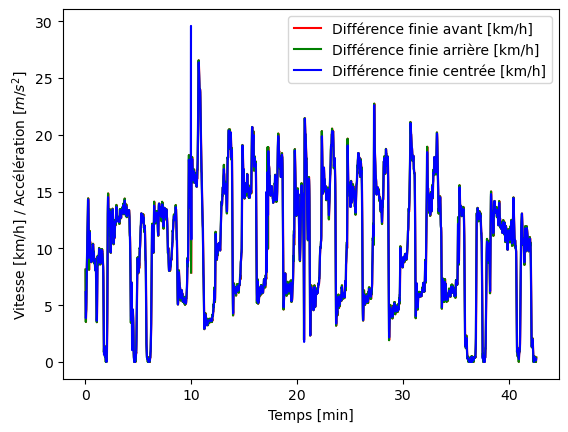

In [16]:
vitesse_1point_x = difference_finie_avant(position_x, temps)
vitesse_1point_y = difference_finie_avant(position_y, temps)
vitesse_1point = np.linalg.norm(np.vstack((vitesse_1point_x, vitesse_1point_y)), axis=0)

vitesse_2points_x = difference_finie_centree(position_x, temps)
vitesse_2points_y = difference_finie_centree(position_y, temps)
vitesse_2points = np.linalg.norm(np.vstack((vitesse_2points_x, vitesse_2points_y)), axis=0)

# Afficher les vitesses
plt.figure()
plt.plot(temps[1:] / 60, vitesse_1point * 3600/1000, 'r', label="Différence finie avant [km/h]")
plt.plot(temps[:-1] / 60, vitesse_1point * 3600/1000, 'g', label="Différence finie arrière [km/h]")
plt.plot(temps[1:-1] / 60, vitesse_2points * 3600/1000, 'b', label="Différence finie centrée [km/h]")
plt.legend()
plt.xlabel("Temps [min]")
plt.ylabel("Vitesse [km/h]")
plt.show()

### On voit que le plan d'entraînement a bien été respecté (échauffement, intervalles: 1min marche + 1min course + 30s sprint, cool down). On voit aussi qu'au sein des blocs de marche il y a de la récupération et qu'au sein des blocs de course il y a de la fatigue.

### Si on zoom, on voit que la différence finie centrée agit un peu comme un filtre.

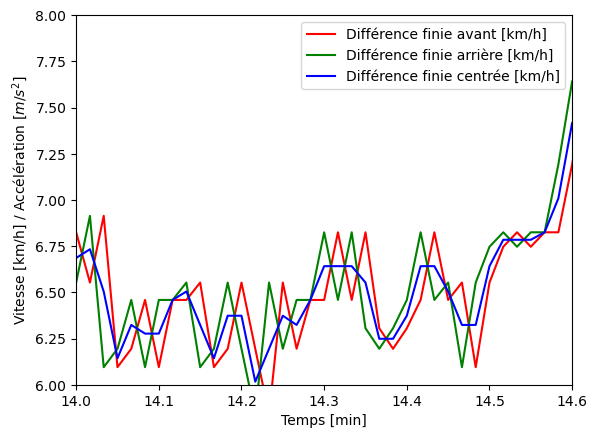

In [18]:
plt.figure()
plt.plot(temps[1:] / 60, vitesse_1point * 3600/1000, 'r', label="Différence finie avant [km/h]")
plt.plot(temps[:-1] / 60, vitesse_1point * 3600/1000, 'g', label="Différence finie arrière [km/h]")
plt.plot(temps[1:-1] / 60, vitesse_2points * 3600/1000, 'b', label="Différence finie centrée [km/h]")
plt.legend()
plt.xlabel("Temps [min]")
plt.ylabel("Vitesse [km/h]")
plt.xlim(14, 14.6)
plt.ylim(6, 8)
plt.show()

### Comparons maintenant notre méthodes avec la vitesse mesurée par l'entraineur...

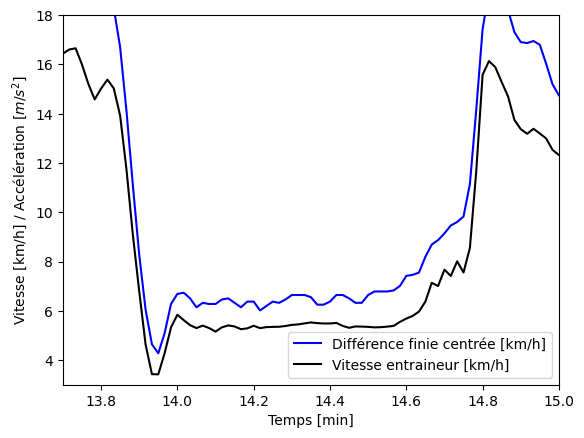

In [20]:
vitesse_entraineur = dataset['extensions/speed']

plt.figure()
plt.plot(temps[1:-1] / 60, vitesse_2points * 3600/1000, 'b', label="Différence finie centrée [km/h]")
plt.plot(temps / 60, vitesse_entraineur * 3600/1000, 'k', label="Vitesse entraineur [km/h]")
plt.legend()
plt.xlabel("Temps [min]")
plt.ylabel("Vitesse [km/h]")
plt.xlim(13.7, 15)
plt.ylim(3, 18)
plt.show()

### ... Comment se fait-il que les données ne soient pas superposées?

# Bonus
### Ici, on a considéré qu'on pouvait négliger la courbure de la Terre, mais ce n'est pas le cas. Voici la façon de faire pour les intéressés.
https://en.wikipedia.org/wiki/Haversine_formula

In [21]:
def convertir_longitude_latitude_en_distance(latitude, longitude):
    
    # Calculer la distance parcourue entre chaque poin de donnée
    dlat_1point = latitude[1:] - latitude[:-1]
    dlon_1point = longitude[1:] - longitude[:-1]
    
    # Formule de Haversine pour la différence entre deux point consécutifs
    a_1point = np.sin(dlat_1point / 2)**2 + np.cos(latitude[:-1]) * np.cos(latitude[1:]) * np.sin(dlon_1point / 2)**2
    c_1point = 2 * np.arctan2(np.sqrt(a_1point), np.sqrt(1 - a_1point))
    distance_parcourue_1point = R * c_1point
    
    # Formule de Haversine pour la différence entre deux point par bonds de 2
    dlat_2points = latitude[2:] - latitude[:-2]
    dlon_2points = longitude[2:] - longitude[:-2]
    a_2points = np.sin(dlat_2points / 2)**2 + np.cos(latitude[:-2]) * np.cos(latitude[2:]) * np.sin(dlon_2points / 2)**2
    c_2points = 2 * np.arctan2(np.sqrt(a_2points), np.sqrt(1 - a_2points))
    distance_parcourue_2points = R * c_2points
    
    return distance_parcourue_1point, distance_parcourue_2points

distance_parcourue_1point, distance_parcourue_2points = convertir_longitude_latitude_en_distance(latitude, longitude)
vitesse_1point_courbure = distance_parcourue_1point / (temps[1:] - temps[:-1])
vitesse_centree_courbure = distance_parcourue_2points / (temps[2:] - temps[:-2])

/var/folders/fq/vdtp84x92hgfn2wzk1w_2rfm0000gn/T/ipykernel_43014/2349261678.py:22: RuntimeWarning: divide by zero encountered in divide
  vitesse_1point_courbure = distance_parcourue_1point / (temps[1:] - temps[:-1])


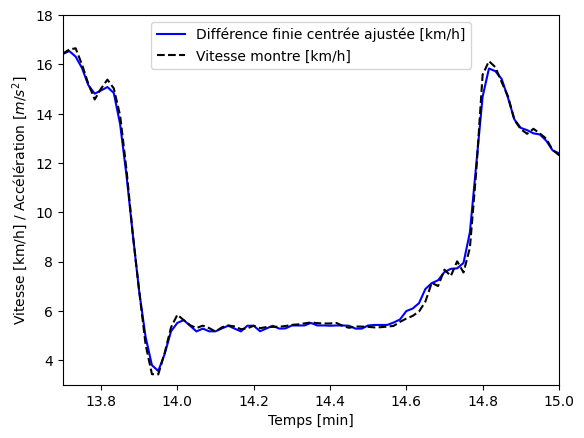

In [16]:
plt.figure()
plt.plot(temps[1:-1] / 60, vitesse_centree_courbure * 3600/1000, 'b', label="Différence finie centrée ajustée [km/h]")
plt.plot(temps / 60, vitesse_entraineur * 3600/1000, '--k', label="Vitesse entraineur [km/h]")
plt.legend()
plt.xlabel("Temps [min]")
plt.ylabel("Vitesse [km/h]")
plt.xlim(13.7, 15)
plt.ylim(3, 18)
plt.show()

<img src="slides/Slide38.jpeg">

<img src="slides/Slide39.jpeg">

<img src="slides/Slide40.jpeg">

<img src="slides/Slide41.jpeg">

<img src="slides/Slide42.jpeg">

<img src="slides/Slide43.jpeg">

<img src="slides/Slide44.jpeg">